In [8]:
import pandas as pd 
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from joblib import Parallel, delayed
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


## Task 1: Sentence decoding

In [ ]:
# Download and extract the data and learn_decoder.py
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!wget --header="Host: drive.usercontent.google.com" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,he;q=0.8" --header="Cookie: HSID=AHJfxja1o67aaDDKP; SSID=AcFaYUEeiC88MwrF9; APISID=-FXvHmBvJ828Jrpq/AaIp_RI6gKwBAA-zy; SAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-1PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; __Secure-3PAPISID=_psqReiv0O2WdiVv/AhLpZThJtVNAPgAJP; S=billing-ui-v3=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:billing-ui-v3-efe=pX9aAWC8SzxQZfQvQ-0SbCFRz65PPkVY:maestro=dsv3G-owxPD6uTATLH0lBQZNadhFo6ZKJiuB9usoQVU; __Secure-BUCKET=CPgG; SID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx_uObP_F4bCqI8I561ccGMwACgYKAWESARQSFQHGX2Mi5DnhBiJ2gjjbMSP0XJbU5BoVAUF8yKrlBjWMdNOfGnmA7TZzmbWD0076; __Secure-1PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyx2BFINS8lXhFUyAFwuvl8CQACgYKAW4SARQSFQHGX2MiWd6bHkI0JN89-1dFZUbS2hoVAUF8yKpc-H3AD8N6tj-dmFG21SeE0076; __Secure-3PSID=g.a000kggtmVDh8D92rqHe5fiG-bMoXQw7Ld8Tf_C8qHhSE2ZoFUyxJl_TGsCsjeiVN72q3lSCWQACgYKASASARQSFQHGX2MiULluXa7aABDwxgCWjB6IyhoVAUF8yKoy_HHYLCqIFMwNjx-GwYWe0076; __Secure-ENID=20.SE=jyM_w2hA8DW6FvPOh9wudde93a0A9P41Epzo098LV_LyU79-VVcJ9K-vNLrhCLuVzi69CyV4RxlSls8AAT9J8odwIXi_ISVn8Z1U1DH52BC3YiwOwO9LKUsBesCbGx2D6u1XwZ5GIP_PZMo1tkLLJq2VCtcxRP9OtC_QgHNbAD4eyc1TTu1C8XbZLFTOIgb0k9IfM2bMBXeha6t3sJysARZWpDIzs3I8wWZ5JtABB253grtjQyCnxyy9MUgTcYAVaoEGwgVHV4V4lSY6gydFkO2gYxl7JqYloqCq74HahGK54TBlsGZIOTM_KvFAsIidcrPaVOBpH6IGQTPChxy3Tr-GLK7VpBiQ8JW7V0xC8XTN1crEaaZnGFQ6MrjDv8f3hCY0Kg; AEC=AQTF6HwEtUB747fVHMzvOWJV9pmRoGs8Ix8FJ1HTrxbE9NY1dtyro2AvNQ; NID=515=Wdt0NWZqVSh3TtdIfjXCGTCCkj7jaJjt-lkOL3hLD_hPSSMyGxKkVthECwGGFbbxmvfM2iKZ1SkPGDVgLwjghAOrV9Ya7iEJJ0eSXZSfszc0WxRXm3Jy6LxqPEZLmY8v3AIkMX-o8KE5ZRXGEzgv_s9pfgS8bmeiIGT13Iiyw9tPzRZDChGijNbZ0Mp1oF-4YKikOZCyo8Km9wXOgLAC9dbeIqAlTdER97cQ7B5GajyRLH_bFrg0lCVN4tyZEycjihHOu6Eq_V88rswgV7uvzemJ_yk4WbbIWJVm9NCO4tWdDQG8NY3EY57xAJbmIhu260jDftYwzjCnpqJ8C1iCm-FjboF6xJwKJEtLkCXagIcSWxfPGqRWIn5KY72ogAMZTlUZ5RE5F8bH4sFgkt5pW_AalY5mxYPOfZgF-9hcJYsF71rMOic6mqSfvR8iNo-k6_SZ-4o5WkYxbwdLgiaIOiCJHkhIGBoXsm5hh5BHDqlk5ERGnFn5zpqOguNLJFjXT3nhaP1g_a2fFvd0bmZw2A9Y6tBNAC7CbDOmSHSmYmLag0qVcqu286CZh5svuhdM-QPcSCt5u0kPgfWN3KBha0G9L9qCiDIwntvnlVNoUYLBM4je1bhGjO9M2tdH_vteLo4vjm9Cq-4I2A; __Secure-1PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; __Secure-3PSIDTS=sidts-CjIB3EgAEi6AJoaJlu_IOdqmparuSFUne3RqD5YKK5hcqKjRlc0CTp9lSpyH2OoVVoqmlxAA; SIDCC=AKEyXzW7IJ8miV8hX_pqzqqPW7--eMWuWfausspLBoDPlfZDCRZDED56ohpancLYOBPizfUzi1aM; __Secure-1PSIDCC=AKEyXzVGnmSuG07J22njRVFPQ_sk88MgnqtYxJd-M0_9Pz3jdh4GpGPhPOqCMrayTU9SJTW3n54; __Secure-3PSIDCC=AKEyXzVScJYbKdtIImPYKpTRkExsc5UhC5n9Rkk8wNFlMZNW3_xkvWlimAXWaZ4T7kTcJy5AE4I" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56&export=download&authuser=0&confirm=t&uuid=efeb9ce5-a5c5-453b-938d-6c0ece963f3c&at=APZUnTV18b5mSao0MQ2JbtpefTxr%3A1719665236172" -c -O 'files.zip'
!unzip files.zip
!rm files.zip

In [9]:
#Let's load the functions from learn_decoder.py
from learn_decoder import *

def read_matrix2(filename, sep=","):
    lines = []
    with open(filename) as infile:
        next(infile)  # skip the header row
        for line in infile:
            parts = line.strip().split(sep)
            if len(parts) > 1:
                # Skip the first column (row index), and convert the rest to floats
                float_vals = [float(x) for x in parts[1:] if x]
                lines.append(float_vals)
    return np.array(lines)

# and the data
data = read_matrix("imaging_data.csv", sep=",")
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U'))

### Calculating embeddings with fasttext

In [ ]:
import gensim
from gensim.models import KeyedVectors

# Path to your FastText vectors (after you unzip the .zip file)
fasttext_path = 'crawl-300d-2M-subword.vec'

# Load the FastText vectors with gensim
print("Loading FastText vectors...")
model = KeyedVectors.load_word2vec_format(fasttext_path)


In [ ]:
# Creating the embedding matrix
embeddings = np.zeros((len(concepts), model.vector_size))
missing = []

for i, concept in enumerate(concepts):
    # Try the concept as-is, or lowercase
    if concept in model:
        embeddings[i] = model[concept]
    elif concept.lower() in model:
        embeddings[i] = model[concept.lower()]
    else:
        # Even if a word is not in the vocab, FastText will build it from subwords
        try:
            embeddings[i] = model.get_vector(concept)
        except Exception as e:
            missing.append(concept)
            embeddings[i] = np.zeros(model.vector_size)
            print(f"Word '{concept}' not found in model: {e}")

print(f"Missing words: {missing}")

# Saving the embedding matrix in space-separated format
np.savetxt('vectors_180concepts.fasttext.txt', embeddings, fmt='%.6f')
print("Done! Embeddings saved to 'vectors_180concepts.fasttext.txt'")

In [10]:
vectors_fasttext = read_matrix("vectors_180concepts.fasttext.txt", sep=" ")


In [11]:

k = 18                # Number of folds
fold_size = 10        # Concepts per fold
n_concepts = data.shape[0]

all_ranks = []        # List to hold (concept, rank) for each test instance
average_ranks = []    # List to hold mean rank per fold

from sklearn.metrics.pairwise import cosine_similarity

def get_rank(decoded, gold_vec, vocab_vectors):
    """
    Returns the rank position of the true vector among all candidate vectors
    based on cosine similarity with the decoded vector.
    """
    sims = cosine_similarity(decoded.reshape(1, -1), vocab_vectors).flatten()
    gold_idx = np.where((vocab_vectors == gold_vec).all(axis=1))[0][0]
    ranked_indices = np.argsort(-sims)
    return ranked_indices.tolist().index(gold_idx) + 1


# ------------------ GloVe ------------------
print("\n--- GloVe results ---")
all_ranks = []
average_ranks = []

for fold in range(k):
    test_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
    train_idx = np.setdiff1d(np.arange(n_concepts), test_idx)
    train_data, train_vectors = data[train_idx], vectors[train_idx]
    test_data, test_vectors, test_concepts = data[test_idx], vectors[test_idx], concepts[test_idx]
    decoder = learn_decoder(train_data, train_vectors)
    decoded_vectors = test_data @ decoder
    fold_ranks = []
    for i in range(fold_size):
        rank = get_rank(decoded_vectors[i], test_vectors[i], vectors)
        fold_ranks.append((test_concepts[i], rank))
    all_ranks.extend(fold_ranks)
    fold_mean = np.mean([r[1] for r in fold_ranks])
    average_ranks.append(fold_mean)
    print(f"GloVe | Fold {fold + 1}/{k} - Average Rank: {fold_mean:.2f}")

print(f"\nGloVe | Average rank across all folds: {np.mean(average_ranks):.2f}")

# ------------------ FastText ------------------
print("\n--- FastText results ---")
all_ranks_ft = []
average_ranks_ft = []

for fold in range(k):
    test_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
    train_idx = np.setdiff1d(np.arange(n_concepts), test_idx)
    train_data, train_vectors = data[train_idx], vectors_fasttext[train_idx]
    test_data, test_vectors, test_concepts = data[test_idx], vectors_fasttext[test_idx], concepts[test_idx]
    decoder = learn_decoder(train_data, train_vectors)
    decoded_vectors = test_data @ decoder
    fold_ranks = []
    for i in range(fold_size):
        rank = get_rank(decoded_vectors[i], test_vectors[i], vectors_fasttext)
        fold_ranks.append((test_concepts[i], rank))
    all_ranks_ft.extend(fold_ranks)
    fold_mean = np.mean([r[1] for r in fold_ranks])
    average_ranks_ft.append(fold_mean)
    print(f"FastText | Fold {fold + 1}/{k} - Average Rank: {fold_mean:.2f}")

print(f"\nFastText | Average rank across all folds: {np.mean(average_ranks_ft):.2f}")


--- GloVe results ---
GloVe | Fold 1/18 - Average Rank: 66.70
GloVe | Fold 2/18 - Average Rank: 62.30
GloVe | Fold 3/18 - Average Rank: 60.40
GloVe | Fold 4/18 - Average Rank: 70.60
GloVe | Fold 5/18 - Average Rank: 81.30
GloVe | Fold 6/18 - Average Rank: 74.50
GloVe | Fold 7/18 - Average Rank: 77.00
GloVe | Fold 8/18 - Average Rank: 46.70
GloVe | Fold 9/18 - Average Rank: 105.10
GloVe | Fold 10/18 - Average Rank: 39.10
GloVe | Fold 11/18 - Average Rank: 65.60
GloVe | Fold 12/18 - Average Rank: 56.50
GloVe | Fold 13/18 - Average Rank: 36.90
GloVe | Fold 14/18 - Average Rank: 66.00
GloVe | Fold 15/18 - Average Rank: 41.70
GloVe | Fold 16/18 - Average Rank: 36.80
GloVe | Fold 17/18 - Average Rank: 39.70
GloVe | Fold 18/18 - Average Rank: 87.50

GloVe | Average rank across all folds: 61.91

--- FastText results ---
FastText | Fold 1/18 - Average Rank: 60.10
FastText | Fold 2/18 - Average Rank: 47.90
FastText | Fold 3/18 - Average Rank: 59.40
FastText | Fold 4/18 - Average Rank: 50.60
Fas

**As we can see from these results, fasttext outperformes the glove results.**

Glove avg rank is 61.91 vs fasttext avg rank is 53.51.

Now let's plot the averaged accuracy score for each fold  

*   fasttext
*   glove



---



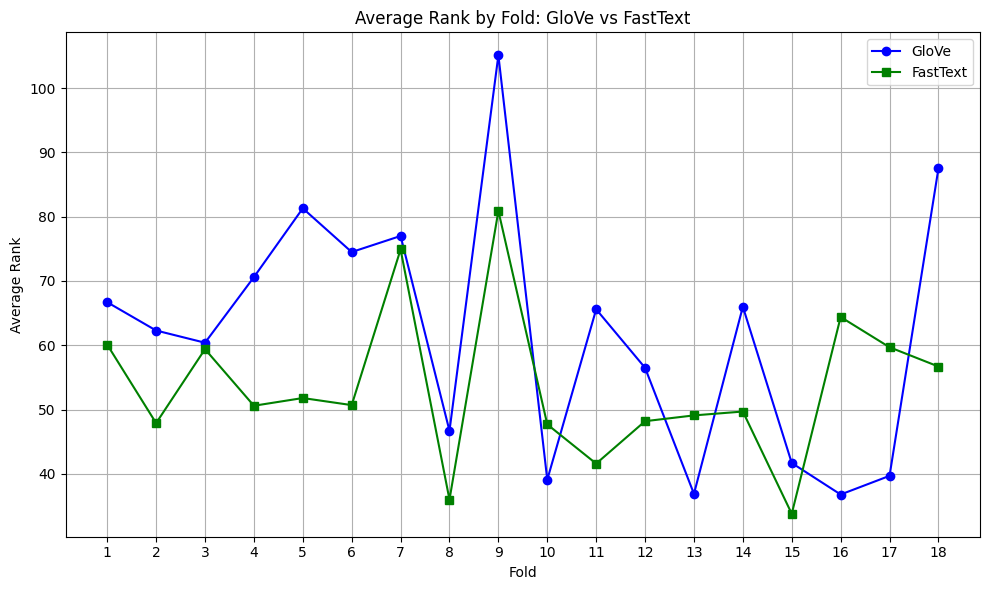

In [12]:
accuracies_GLoVe = []
all_ranks_GLoVe = []

# GloVe loop
for fold in range(k):
    test_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
    train_idx = np.setdiff1d(np.arange(n_concepts), test_idx)
    train_data, train_vectors = data[train_idx], vectors[train_idx]
    test_data, test_vectors, test_concepts = data[test_idx], vectors[test_idx], concepts[test_idx]
    decoder = learn_decoder(train_data, train_vectors)
    decoded_vectors = test_data @ decoder
    fold_ranks = []
    for i in range(fold_size):
        rank = get_rank(decoded_vectors[i], test_vectors[i], vectors)
        fold_ranks.append((test_concepts[i], rank))
    all_ranks_GLoVe.extend(fold_ranks)
    fold_mean = np.mean([r[1] for r in fold_ranks])
    accuracies_GLoVe.append(fold_mean)

# FASTTEXT loop
accuracies_fasttext = []
all_ranks_fasttext = []

for fold in range(k):
    test_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
    train_idx = np.setdiff1d(np.arange(n_concepts), test_idx)
    train_data, train_vectors = data[train_idx], vectors_fasttext[train_idx]
    test_data, test_vectors, test_concepts = data[test_idx], vectors_fasttext[test_idx], concepts[test_idx]
    decoder = learn_decoder(train_data, train_vectors)
    decoded_vectors = test_data @ decoder
    fold_ranks = []
    for i in range(fold_size):
        rank = get_rank(decoded_vectors[i], test_vectors[i], vectors_fasttext)
        fold_ranks.append((test_concepts[i], rank))
    all_ranks_fasttext.extend(fold_ranks)
    fold_mean = np.mean([r[1] for r in fold_ranks])
    accuracies_fasttext.append(fold_mean)

plt.figure(figsize=(10, 6))
plt.xlabel('Fold')
plt.xticks(list(range(1, 19, 1)))
plt.ylabel('Average Rank')
plt.title("Average Rank by Fold: GloVe vs FastText")

# Plotting GloVe results
plt.plot(list(range(1, 19, 1)), accuracies_GLoVe, marker='o', label="GloVe", color='blue')

# Plotting FastText results
plt.plot(list(range(1, 19, 1)), accuracies_fasttext, marker='s', label="FastText", color='green')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that in most of the folds, fasttext is better than glove.

### Which concepts can be decoded with more or less success?

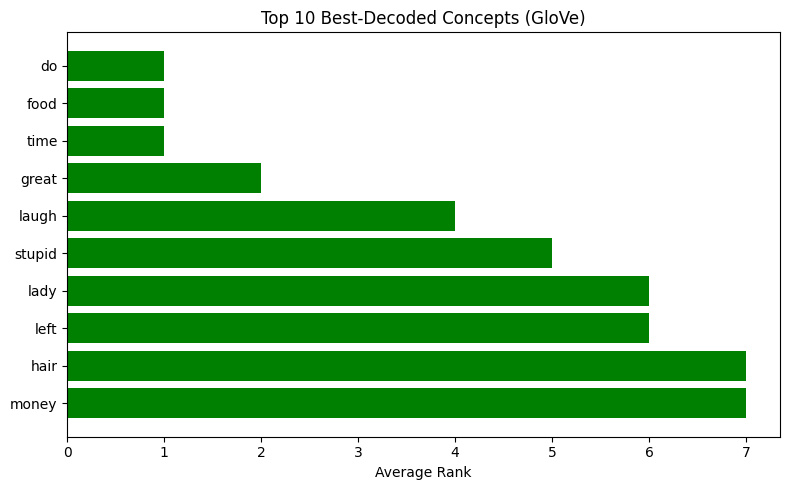

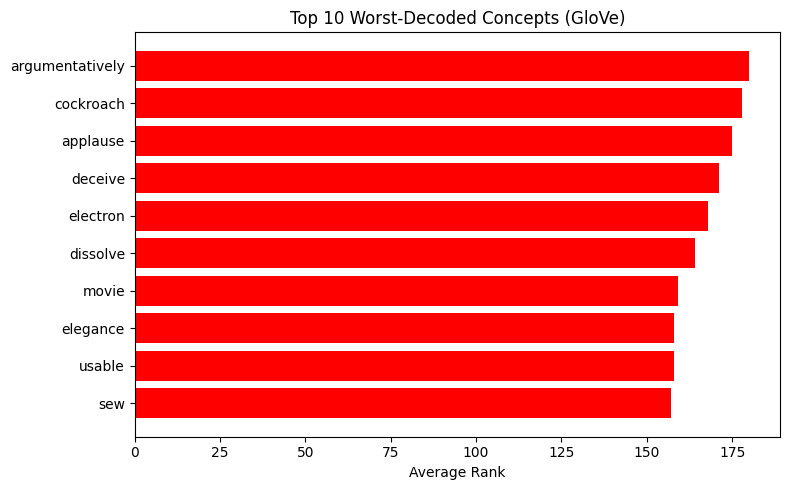

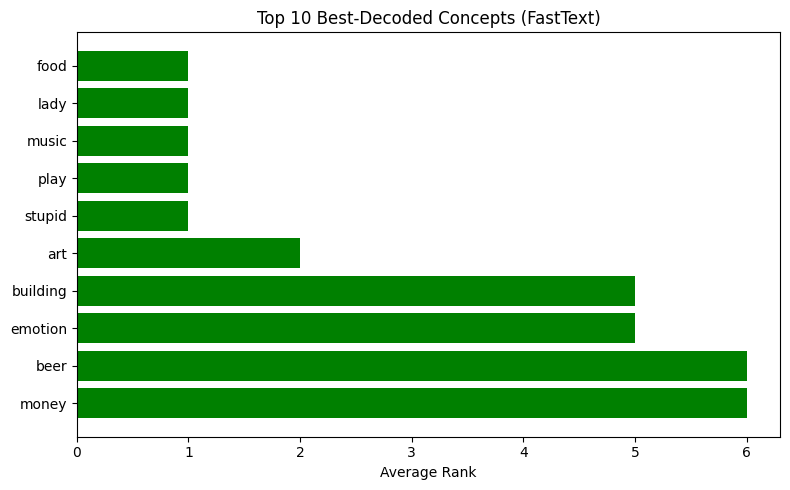

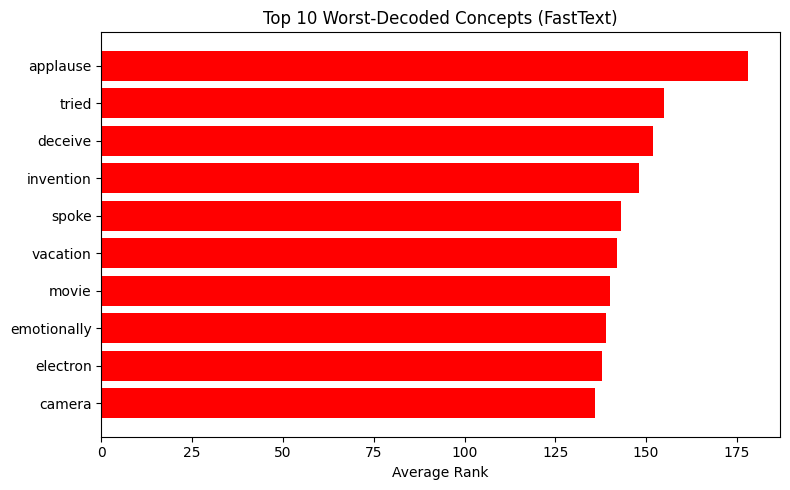

In [13]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

def plot_best_worst_decoded_concepts(concept_ranks_tuples, method_name, top_k=10):
    """
    Plots the top_k best and worst decoded concepts based on their average ranks.
    
    Args:
        concept_ranks_tuples (list): List of (concept, rank) tuples.
        method_name (str): Name of the embedding method (e.g., 'GloVe', 'FastText').
        top_k (int): Number of top/worst items to plot.
    """
    # Group all ranks by concept
    concept_ranks = defaultdict(list)
    for concept, rank in concept_ranks_tuples:
        concept_ranks[concept].append(rank)
    # Compute average rank per concept
    concept_avg_ranks = {c: np.mean(r) for c, r in concept_ranks.items()}
    # Sort by average rank
    best_decoded = sorted(concept_avg_ranks.items(), key=lambda x: x[1])[:top_k]
    worst_decoded = sorted(concept_avg_ranks.items(), key=lambda x: x[1], reverse=True)[:top_k]

    # ---- Plot best decoded ----
    plt.figure(figsize=(8, 5))
    concepts_best = [c for c, _ in best_decoded][::-1]
    scores_best = [r for _, r in best_decoded][::-1]
    plt.barh(concepts_best, scores_best, color='green')
    plt.xlabel("Average Rank")
    plt.title(f"Top {top_k} Best-Decoded Concepts ({method_name})")
    plt.tight_layout()
    plt.show()

    # ---- Plot worst decoded ----
    plt.figure(figsize=(8, 5))
    concepts_worst = [c for c, _ in worst_decoded][::-1]
    scores_worst = [r for _, r in worst_decoded][::-1]
    plt.barh(concepts_worst, scores_worst, color='red')
    plt.xlabel("Average Rank")
    plt.title(f"Top {top_k} Worst-Decoded Concepts ({method_name})")
    plt.tight_layout()
    plt.show()

# --- Run for GloVe ---
plot_best_worst_decoded_concepts(all_ranks, method_name="GloVe")

# --- Run for FastText ---
plot_best_worst_decoded_concepts(all_ranks_ft, method_name="FastText")

When comparing the decoding results for GloVe and FastText embeddings, both models are able to perfectly decode a handful of concepts, as seen by the lowest average ranks (close to 1) for the top words. For example, words like “food,” “lady,” and “stupid” are among the best-decoded for both models. FastText’s best-decoded concepts often have slightly lower average ranks compared to GloVe, suggesting that FastText is a bit more precise for these top words. 

On the other hand, the worst-decoded concepts show high average rank values for both embeddings, with some overlap in the most difficult words (like “applause,” “deceive,” and “electron”). In general, FastText seems to perform a little better on the best cases, while both embeddings struggle with certain abstract or less common words. This pattern highlights the overall advantage of FastText, especially for concepts that appear frequently or are easy to represent, while rare or complex words remain a challenge for both approaches.

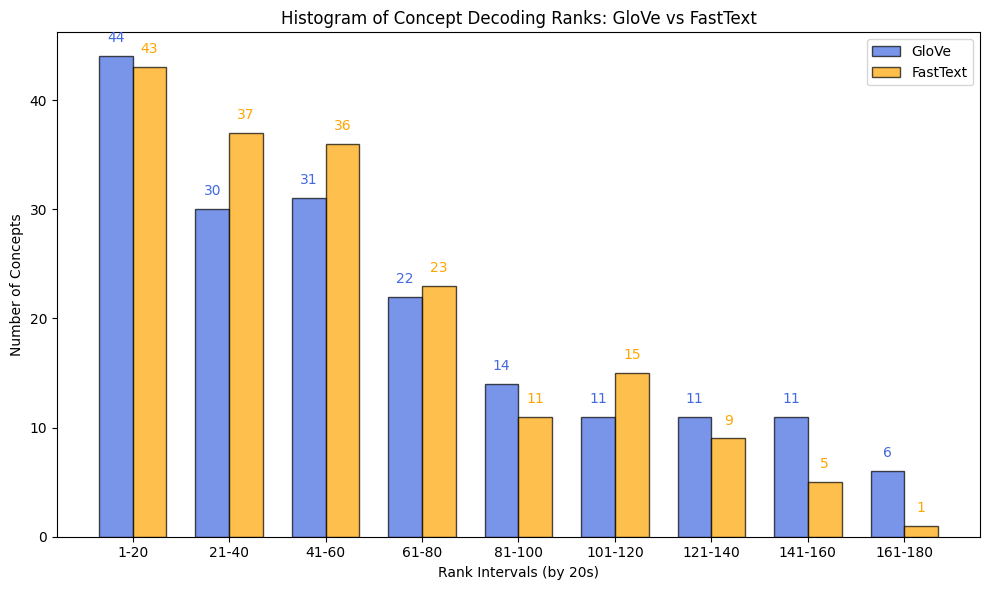

In [14]:
def plot_rank_histograms(score1, label1, color1, score2, label2, color2):
    # Helper function to extract and bin ranks
    def bin_counts(all_concept_score):
        ranks = [rank for _, rank in all_concept_score]
        counts = [0] * 180
        for r in ranks:
            if 1 <= r <= 180:
                counts[r - 1] += 1
        return [sum(counts[i:i+20]) for i in range(0, 180, 20)]

    bins1 = bin_counts(score1)
    bins2 = bin_counts(score2)
    x = np.arange(1, 10)

    width = 0.35  # Bar width

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, bins1, width=width, color=color1, alpha=0.7, label=label1, edgecolor='black')
    plt.bar(x + width/2, bins2, width=width, color=color2, alpha=0.7, label=label2, edgecolor='black')

    # Value labels
    for i in range(9):
        plt.text(x[i] - width/2, bins1[i] + 1, str(bins1[i]), ha='center', va='bottom', fontsize=10, color=color1)
        plt.text(x[i] + width/2, bins2[i] + 1, str(bins2[i]), ha='center', va='bottom', fontsize=10, color=color2)

    plt.xlabel('Rank Intervals (by 20s)')
    plt.ylabel('Number of Concepts')
    plt.title('Histogram of Concept Decoding Ranks: GloVe vs FastText')
    plt.xticks(x, [f'{i*20+1}-{(i+1)*20}' for i in range(9)])
    plt.legend()
    plt.tight_layout()
    plt.show()

# Make sure these are your variables from the evaluation loop
all_concept_score_GLoVe = all_ranks_GLoVe      # List of (concept, rank) for GloVe
all_concept_score_fasttext = all_ranks_fasttext  # List of (concept, rank) for FastText
plot_rank_histograms(
    all_concept_score_GLoVe, "GloVe", "royalblue",
    all_concept_score_fasttext, "FastText", "orange"
)

---

**Analysis of Concept Decoding Rank Distributions: GloVe vs. FastText**

The histogram shows that both GloVe and FastText decode most concepts with relatively low ranks, but GloVe has a slight edge in the best rank interval (1–20). FastText, however, has more concepts in the mid-range intervals (21–60). At the higher (worse) rank intervals, GloVe tends to have more poorly-decoded concepts than FastText. Overall, both embeddings perform similarly, but FastText produces fewer extremely bad results.



### write about similarities and differences of 1,2,3

The three experiments described in Pereira et al. (2018) share several important similarities but differ in their specific goals and the types of materials used. All three experiments used the same decoding model, trained to translate fMRI brain activity into semantic vectors representing meaning, and relied on similar evaluation methods to measure decoding accuracy. However, the experiments differed in complexity and scope: 

Experiment 1 focused on decoding individual words (concepts) presented in controlled contexts (sentences, images, word clouds), and showed that the decoder could robustly classify new concepts with high accuracy, achieving mean pairwise classification accuracies up to 0.77 and rank accuracy around 0.74 across participants. 

Experiment 2 expanded the task to sentence-level decoding using Wikipedia-style texts, and demonstrated that the decoder—trained only on single-word concepts—could still distinguish sentences across a wide range of topics and granularities, with pairwise accuracies around 0.81 and rank accuracy near 0.76. 

Experiment 3 pushed this further by testing the decoder on independent materials provided by an external agency, including both Wikipedia-style texts and first-/third-person narratives; here, the decoder performed slightly better, with mean pairwise accuracies up to 0.85 and rank accuracy around 0.79. These results together demonstrate that a decoder trained on a strategically selected set of word meanings can reliably generalize to new, naturalistic sentences and diverse linguistic materials, accurately recovering the structure of meaning from patterns of brain activity.

---


In terms of results, the decoder achieved strong and statistically significant performance across all three experiments.

 In Experiment 1, the decoder could robustly classify new individual concepts, reaching mean pairwise classification accuracies of up to 0.77 and rank accuracy around 0.74. 
 
 In Experiment 2, the decoder successfully distinguished between sentences at multiple levels of semantic similarity, achieving pairwise accuracies around 0.81 and rank accuracy near 0.76. 
 
 In Experiment 3, where the materials were independent and more naturalistic, the decoder performed slightly better, with mean pairwise classification accuracies up to 0.85 and rank accuracy around 0.79. These findings demonstrate that a decoder trained on carefully selected word meanings can reliably generalize to new, naturalistic sentences and diverse linguistic materials, accurately capturing the structure of meaning from patterns of brain activity.

## analyses 2 & 3

**Use the GloVe based decoder model you trained in Homework Assignment 3 question 3 and test it on the datasets from analyses 2 & 3. Each dataset contains sentence repre- sentations (i.e. a vector representation averaged over all the words in the sentence) and the corresponding neural data from an individual subject (384 sentences from analysis 2 and 243 from analysis 3; The datasets are available in a Google Drive Folder3). For each dataset, use the learned decoder model to decode sentence representations and evaluate the performance via the rank accuracy method (as you did in HW3).**

In [15]:
data = read_matrix2("exp23/neuralData_for_EXP1.csv")
# Load concept fMRI and GloVe vectors
M = learn_decoder(data, vectors)   # M shape: (V, 300)
M.shape

(185866, 300)

In [16]:
import pickle

# Load Exp2 (384 sentences)
with open('exp23/EXP2.pkl', 'rb') as f:
    data_exp2 = pickle.load(f)
fmri_exp2 = data_exp2['Fmridata']  # (384, 185866)
vectors_exp2 = read_matrix("exp23/vectors_384sentences.GV42B300.average.txt", sep=" ")  # (384, 300)

# Load Exp3 (243 sentences)
with open('exp23/EXP3.pkl', 'rb') as f:
    data_exp3 = pickle.load(f)
fmri_exp3 = data_exp3['Fmridata']  # (243, 185866)
vectors_exp3 = read_matrix("exp23/vectors_243sentences.GV42B300.average.txt", sep=" ")  # (243, 300)

# Print shapes
print(f"fmri_exp2 shape:    {fmri_exp2.shape}")
print(f"vectors_exp2 shape: {vectors_exp2.shape}")
print(f"fmri_exp3 shape:    {fmri_exp3.shape}")
print(f"vectors_exp3 shape: {vectors_exp3.shape}")

fmri_exp2 shape:    (384, 185866)
vectors_exp2 shape: (384, 300)
fmri_exp3 shape:    (243, 185866)
vectors_exp3 shape: (243, 300)


In [17]:
decoded_exp2 = np.dot(fmri_exp2, M)   # (384, 300)
decoded_exp3 = np.dot(fmri_exp3, M)   # (243, 300)

In [ ]:
def average_rank_get_rank(decoded, gold_vectors):
    """
    For each decoded vector, compute its rank among all gold_vectors using cosine similarity.
    Returns mean average rank and a list of all ranks (1=best).
    """
    all_ranks = []
    for i in range(len(decoded)):
        rank = get_rank(decoded[i], gold_vectors[i], gold_vectors)
        all_ranks.append(rank)
    mean_rank = np.mean(all_ranks)
    return mean_rank, all_ranks

# Now run for Exp2 and Exp3
mean_rank_exp2, all_ranks_exp2 = average_rank_get_rank(decoded_exp2, vectors_exp2)
print("Experiment 2: Mean Average Rank:", mean_rank_exp2)

mean_rank_exp3, all_ranks_exp3 = average_rank_get_rank(decoded_exp3, vectors_exp3)
print("Experiment 3: Mean Average Rank:", mean_rank_exp3)

Experiment 2: Mean Average Rank: 156.92708333333334
Experiment 3: Mean Average Rank: 100.7448559670782


We can see that the results are relatively poor, which may be expected given that the decoder was originally trained on individual word representations. In this task, however, it was tested on sentence-level embeddings—vectors that capture the meaning of entire sentences—potentially introducing a mismatch that could explain the drop in performance.

---


 Each sentence, in both datasets, is related to a specific passage (a single passage contains 3 or 4 sentences), and every passage is related to a specific broad topic (e.g., musical instrument, animals, etc. The labels for the sentences/passages are available in the Google Drive folder as well). You will need to analyze the accuracy scores from the previous section and try to identify the topics where the decoder was more / less successful in predicting the sentences.

In [19]:
# Load the pickle for EXP3
with open('exp23/EXP3.pkl', 'rb') as f:
    data_exp3 = pickle.load(f)

# Each sentence index maps to a passage id
passage_ids = data_exp3['labelsPassageForEachSentence']   # len = 243
# Each passage id maps to a topic id
topic_ids = data_exp3['labelsPassageCategory']            # len = num_passages
# List of topic/category names
topic_names = data_exp3['keyPassageCategory'][0]            # len = num_topics


ranks_exp3 = np.array(all_ranks_exp3)
topic_ranks = []
for sentance_idx in range(len(ranks_exp3)):
    passage_of_sentance = passage_ids[sentance_idx] - 1 # since idx start from 1
    topic_of_sen = topic_ids[passage_of_sentance].item() - 1
    topic_name = topic_names[topic_of_sen]
    topic_ranks.append((topic_name.item(), ranks_exp3[sentance_idx].item()))

topic_ranks

[('beekeeping', 225),
 ('beekeeping', 223),
 ('beekeeping', 112),
 ('beekeeping', 217),
 ('beekeeping', 136),
 ('beekeeping', 210),
 ('beekeeping', 228),
 ('beekeeping', 71),
 ('beekeeping', 231),
 ('beekeeping', 209),
 ('beekeeping', 6),
 ('dreams', 26),
 ('dreams', 32),
 ('dreams', 58),
 ('dreams', 1),
 ('dreams', 13),
 ('dreams', 53),
 ('dreams', 160),
 ('dreams', 31),
 ('dreams', 148),
 ('dreams', 6),
 ('gambling', 33),
 ('gambling', 57),
 ('gambling', 60),
 ('gambling', 36),
 ('gambling', 57),
 ('gambling', 12),
 ('gambling', 172),
 ('gambling', 52),
 ('gambling', 150),
 ('gambling', 87),
 ('hurricane', 128),
 ('hurricane', 192),
 ('hurricane', 74),
 ('hurricane', 205),
 ('hurricane', 57),
 ('hurricane', 141),
 ('hurricane', 23),
 ('hurricane', 22),
 ('hurricane', 141),
 ('hurricane', 15),
 ('ice_cream', 28),
 ('ice_cream', 194),
 ('ice_cream', 154),
 ('ice_cream', 151),
 ('ice_cream', 111),
 ('ice_cream', 37),
 ('ice_cream', 210),
 ('ice_cream', 66),
 ('ice_cream', 20),
 ('ice_cr

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(topic_ranks, columns=['topic', 'rank'])

# Compute mean rank per topic
mean_ranks_per_topic = df.groupby('topic')['rank'].mean().sort_values()


# Best and worst topics
print("\nBest decoded topics (lowest mean rank):")
print(mean_ranks_per_topic.head(5))
print("\nWorst decoded topics (highest mean rank):")
print(mean_ranks_per_topic.tail(5))


Best decoded topics (lowest mean rank):
topic
dreams           52.800000
stress           58.200000
castle           59.100000
opera            63.636364
bone_fracture    68.090909
Name: rank, dtype: float64

Worst decoded topics (highest mean rank):
topic
pharmacist    136.600000
pyramid       147.200000
lawn_mower    148.100000
owl           148.600000
beekeeping    169.818182
Name: rank, dtype: float64


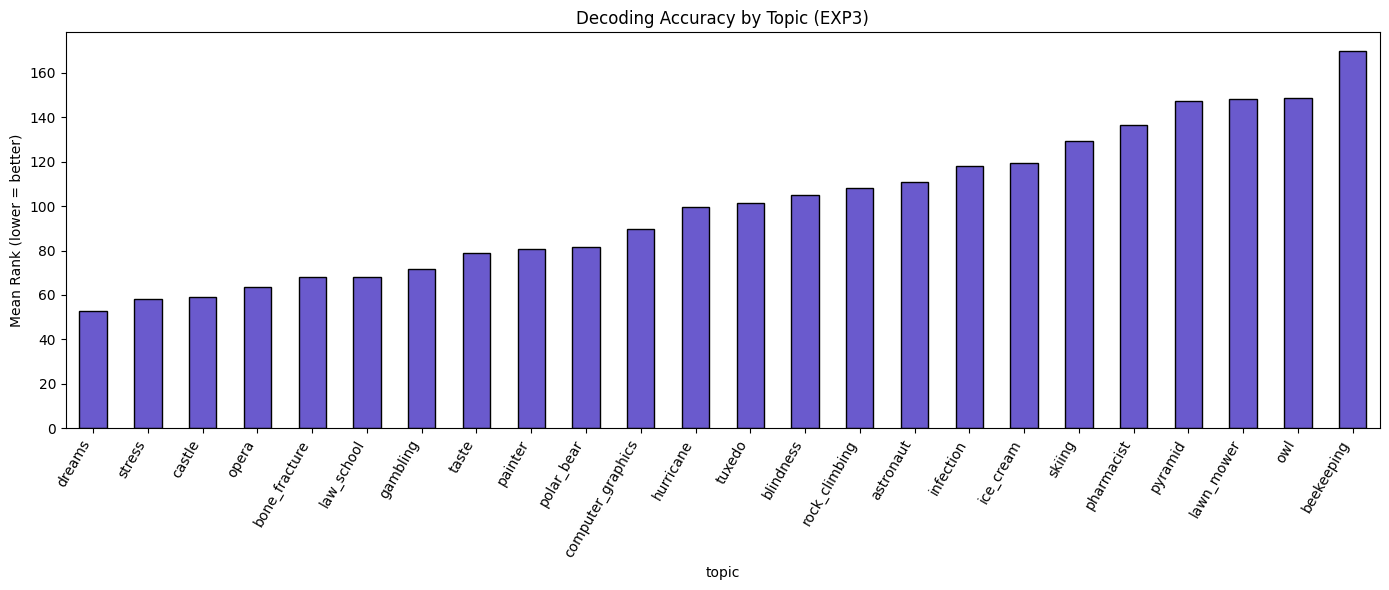

In [21]:
# Plot
plt.figure(figsize=(14,6))
mean_ranks_per_topic.plot(kind='bar', color='slateblue', edgecolor='black')
plt.ylabel("Mean Rank (lower = better)")
plt.title("Decoding Accuracy by Topic (EXP3)")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Looking at the avrage decoding ranks across topics, we can see that some topics were much easier for the decoder to identify than others. For example, sentences about dreams, stress, and castles were decoded with relatively low average ranks, suggesting that the neural patterns associated with these topics were captured more effectively by the decoder. On the other hand, topics like beekeeping, owl, and lawn mowers resulted in much higher ranks, indicating that the decoder struggled more with these concepts. This might suggest that certain topics evoke more consistent or distinguishable brain responses across sentences, while others may involve more varied or less linguistically salient neural activity.

# Task 2: Sentence representations

Train a decoder model on either the dataset from analysis 2 (384 sentences) or from analysis 3 (243 sentences) using both (1) the sentence representations that were used in the paper (the same representations from the structured task) and (2) sentence representations as extracted from a contextualized word embedding model (such as BERT, GPT2, GPT3, etc.). 

Report and compare the results from both methods.

In [22]:
import pickle 
from learn_decoder import *
with open('exp23/EXP3.pkl', 'rb') as f: 
	data = pickle.load(f)

fmri_exp3 = data['Fmridata']
print(fmri_exp3.shape)

with open('exp23/stimuli_243sentences.txt', 'r', encoding='utf-8') as f:
    concepts = [line.strip() for line in f if line.strip()]
    
concepts = np.array(concepts)

(243, 185866)


In [23]:
from sentence_transformers import SentenceTransformer
# Load a BERT-based sentence embedding model
model = SentenceTransformer('all-MiniLM-L6-v2') 

# Encode sentences into embeddings
embeddings_bert = model.encode(concepts, show_progress_bar=True)  # shape: (243, 384)


print("Embeddings shape:", embeddings_bert.shape)  # Should be (243, 384)

#  save file
np.savetxt('vectors_243sentences.bert.txt', embeddings_bert, fmt='%.6f')

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Embeddings shape: (243, 384)


In [24]:
vectors_243_glove = read_matrix("exp23/vectors_243sentences.GV42B300.average.txt", sep=" ")

In [25]:
embeddings_bert = np.loadtxt('vectors_243sentences.bert.txt')

In [26]:
def cross_validation_sentence_decoding(data, vectors, concepts, method_name):
    """
    Run 18-fold cross-validation for sentence decoding, print average rank per fold and overall.
    data:      (num_sentences, num_voxels)
    vectors:   (num_sentences, emb_dim)
    concepts:  (num_sentences,) array of string names
    method_name: str, e.g. 'GloVe', 'BERT', etc.
    Returns:
        all_ranks:      list of (concept, rank) for each sentence in all folds
        average_ranks:  list of average rank per fold
    """
    k = 18
    fold_size = data.shape[0] // k
    n_concepts = data.shape[0]
    all_ranks = []
    average_ranks = []
    for fold in range(k):
        test_idx = np.arange(fold * fold_size, (fold + 1) * fold_size)
        train_idx = np.setdiff1d(np.arange(n_concepts), test_idx)
        train_data, train_vectors = data[train_idx], vectors[train_idx]
        test_data, test_vectors, test_concepts = data[test_idx], vectors[test_idx], concepts[test_idx]
        decoder = learn_decoder(train_data, train_vectors)
        decoded_vectors = test_data @ decoder
        fold_ranks = []
        for i in range(fold_size):
            rank = get_rank(decoded_vectors[i], test_vectors[i], vectors)
            fold_ranks.append((test_concepts[i], rank))
        all_ranks.extend(fold_ranks)
        fold_mean = np.mean([r[1] for r in fold_ranks])
        average_ranks.append(fold_mean)
        print(f"{method_name} | Fold {fold + 1}/{k} - Average Rank: {fold_mean:.2f}")
    print(f"\n{method_name} | Average rank across all folds: {np.mean(average_ranks):.2f}")
    return all_ranks, average_ranks

print("GloVe:")
all_ranks_glove, avg_ranks_glove = cross_validation_sentence_decoding(fmri_exp3, vectors_243_glove, concepts, "GloVe")
print("\nBERT:")
all_ranks_bert, avg_ranks_bert = cross_validation_sentence_decoding(fmri_exp3, embeddings_bert, concepts, "BERT")


GloVe:
GloVe | Fold 1/18 - Average Rank: 141.62
GloVe | Fold 2/18 - Average Rank: 60.15
GloVe | Fold 3/18 - Average Rank: 108.46
GloVe | Fold 4/18 - Average Rank: 115.31
GloVe | Fold 5/18 - Average Rank: 133.31
GloVe | Fold 6/18 - Average Rank: 107.77
GloVe | Fold 7/18 - Average Rank: 51.31
GloVe | Fold 8/18 - Average Rank: 101.92
GloVe | Fold 9/18 - Average Rank: 82.54
GloVe | Fold 10/18 - Average Rank: 134.46
GloVe | Fold 11/18 - Average Rank: 72.77
GloVe | Fold 12/18 - Average Rank: 92.00
GloVe | Fold 13/18 - Average Rank: 108.46
GloVe | Fold 14/18 - Average Rank: 59.00
GloVe | Fold 15/18 - Average Rank: 119.31
GloVe | Fold 16/18 - Average Rank: 96.15
GloVe | Fold 17/18 - Average Rank: 109.23
GloVe | Fold 18/18 - Average Rank: 106.62

GloVe | Average rank across all folds: 100.02

BERT:
BERT | Fold 1/18 - Average Rank: 98.92
BERT | Fold 2/18 - Average Rank: 68.85
BERT | Fold 3/18 - Average Rank: 76.31
BERT | Fold 4/18 - Average Rank: 94.08
BERT | Fold 5/18 - Average Rank: 137.62
BER

We can see that BERT gets better avg rank then Glove.

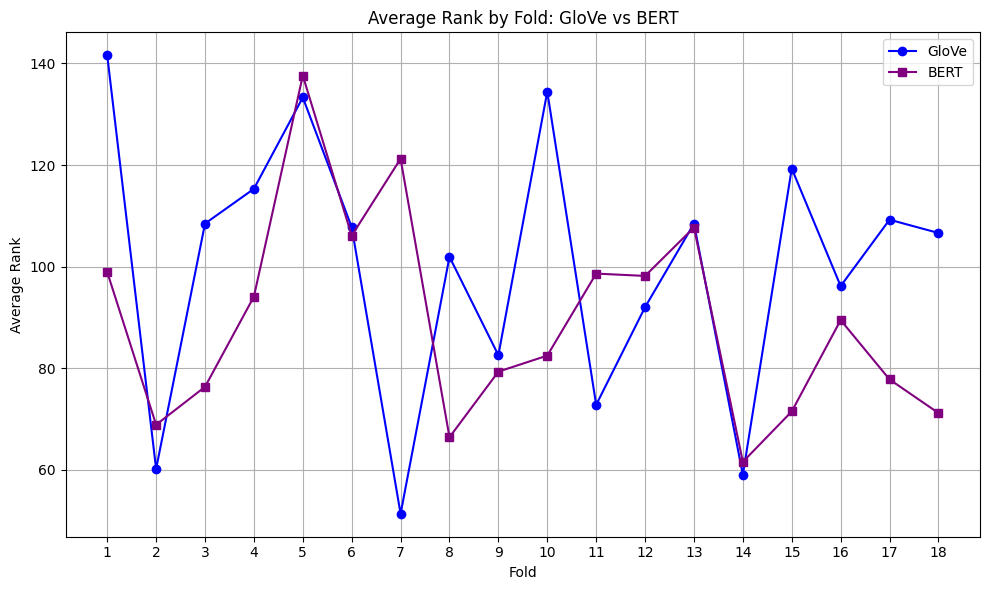

In [27]:
plt.figure(figsize=(10, 6))
plt.xlabel('Fold')
plt.xticks(list(range(1, 19, 1)))
plt.ylabel('Average Rank')
plt.title("Average Rank by Fold: GloVe vs BERT")

# Plotting GloVe results
plt.plot(list(range(1, 19, 1)), avg_ranks_glove, marker='o', label="GloVe", color='blue')

# Plotting BERT results
plt.plot(list(range(1, 19, 1)), avg_ranks_bert, marker='s', label="BERT", color='purple')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The plot shows the average rank for each fold using GloVe and BERT embeddings. Both models have similar trends across folds, and their average ranks are often close to each other, BERT outperforms GloVe in 11 out of 18 folds. Performance for both methods fluctuates from fold to fold, and sometimes GloVe slightly outperforms BERT, while in other folds BERT is better. 

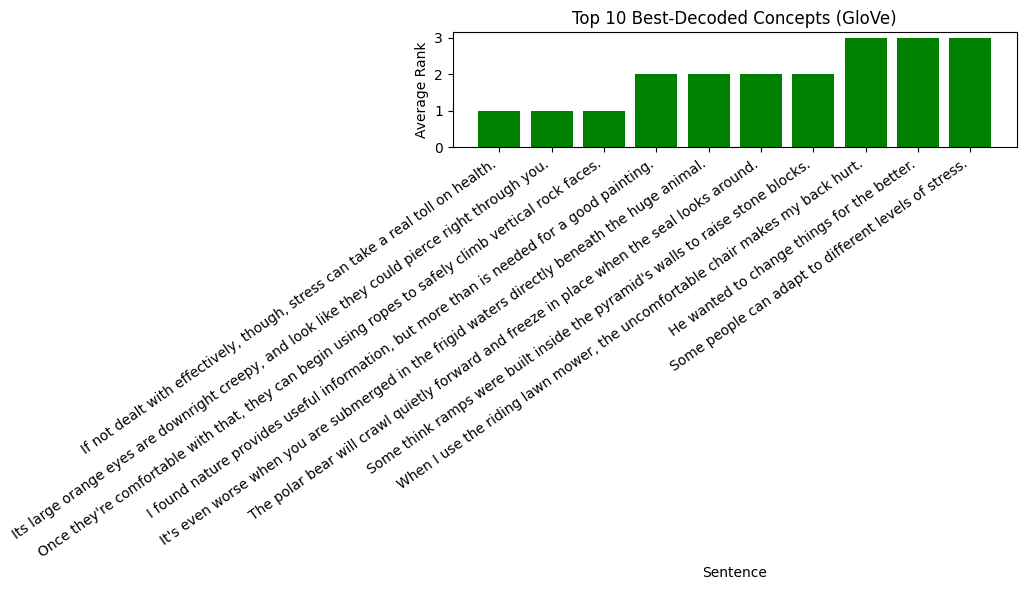

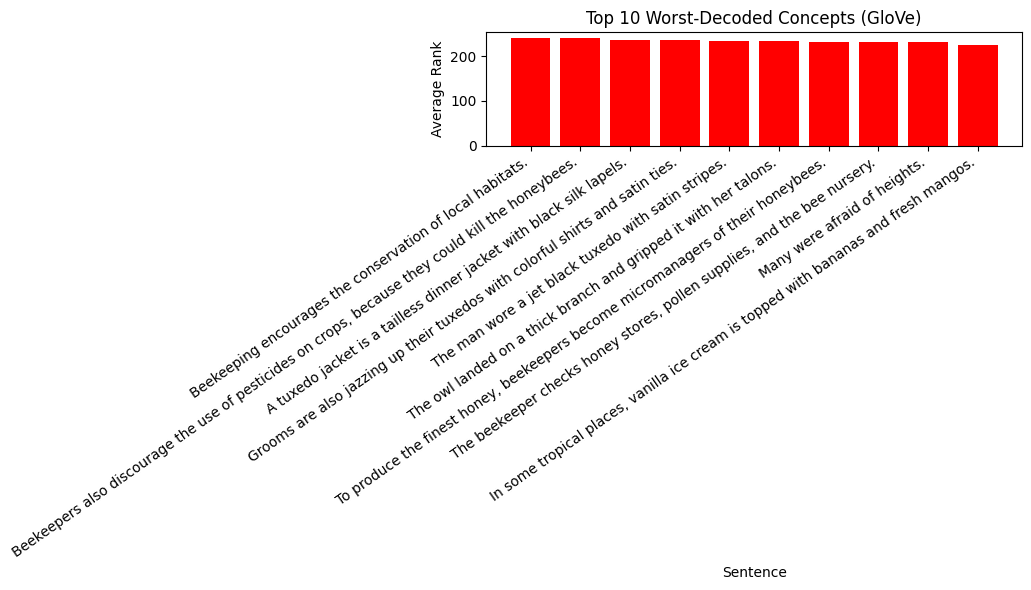

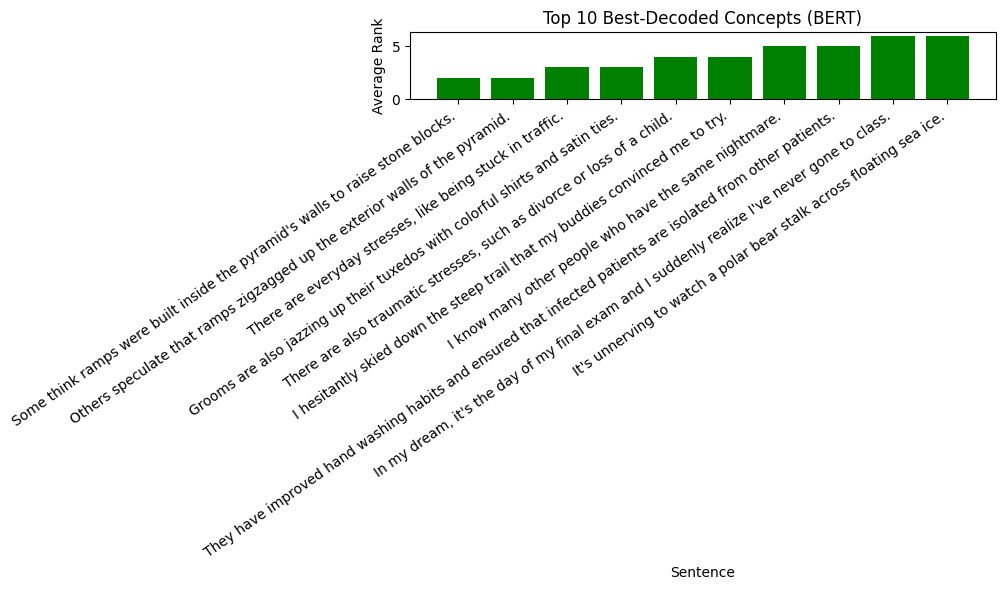

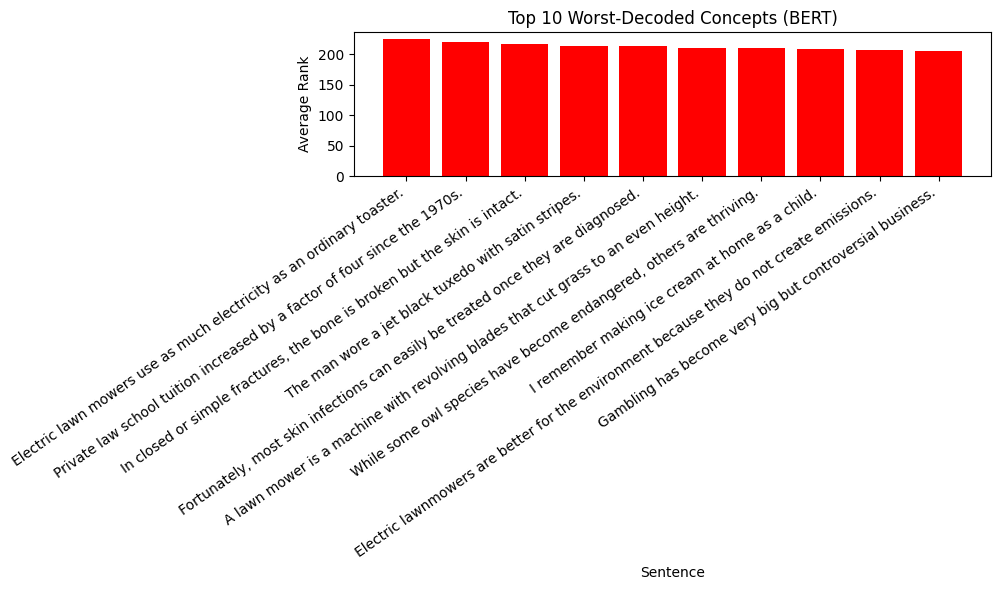

In [28]:

def plot_best_worst_decoded_concepts(concept_ranks_tuples, method_name, top_k=10):
    """
    Plots the top_k best and worst decoded concepts based on their average ranks.
    Uses vertical bars with rotated x labels if concepts are long.
    """
    
    # Group all ranks by concept
    concept_ranks = defaultdict(list)
    for concept, rank in concept_ranks_tuples:
        concept_ranks[concept].append(rank)
    # Compute average rank per concept
    concept_avg_ranks = {c: np.mean(r) for c, r in concept_ranks.items()}
    # Sort by average rank
    best_decoded = sorted(concept_avg_ranks.items(), key=lambda x: x[1])[:top_k]
    worst_decoded = sorted(concept_avg_ranks.items(), key=lambda x: x[1], reverse=True)[:top_k]

    # Detect if labels are long (sentence-level)
    def is_long(labels):
        return any(len(str(x)) > 40 for x in labels)
    # For plotting
    concepts_best = [c for c, _ in best_decoded]
    scores_best = [r for _, r in best_decoded]
    concepts_worst = [c for c, _ in worst_decoded]
    scores_worst = [r for _, r in worst_decoded]

    # Plot best decoded
    plt.figure(figsize=(max(10, top_k), 6))
    if is_long(concepts_best):
        # Vertical bars, rotate x labels
        plt.bar(range(top_k), scores_best, color='green')
        plt.xticks(range(top_k), concepts_best, rotation=35, ha='right', fontsize=10)
        plt.xlabel("Sentence")
        plt.ylabel("Average Rank")
    else:
        # Horizontal bars
        plt.barh(concepts_best[::-1], scores_best[::-1], color='green')
        plt.xlabel("Average Rank")
        plt.ylabel("Concept")
    plt.title(f"Top {top_k} Best-Decoded Concepts ({method_name})")
    plt.tight_layout()
    plt.show()

    # Plot worst decoded
    plt.figure(figsize=(max(10, top_k), 6))
    if is_long(concepts_worst):
        plt.bar(range(top_k), scores_worst, color='red')
        plt.xticks(range(top_k), concepts_worst, rotation=35, ha='right', fontsize=10)
        plt.xlabel("Sentence")
        plt.ylabel("Average Rank")
    else:
        plt.barh(concepts_worst[::-1], scores_worst[::-1], color='red')
        plt.xlabel("Average Rank")
        plt.ylabel("Concept")
    plt.title(f"Top {top_k} Worst-Decoded Concepts ({method_name})")
    plt.tight_layout()
    plt.show()


plot_best_worst_decoded_concepts(all_ranks_glove, 'GloVe')
plot_best_worst_decoded_concepts(all_ranks_bert, 'BERT')


Looking at the best and worst decoded sentences for both GloVe and BERT, we see that GloVe can achieve perfect decoding (rank of 1) on several sentences, sometimes more often than BERT. However, GloVe’s predictions are also more variable, resulting in some sentences with extremely poor ranks above 200. 

In contrast, BERT’s best ranks are usually not as perfect as GloVe’s, but its performance is more consistent, with fewer sentences receiving very high ranks. Overall, this suggests that while GloVe sometimes produces excellent results, it is less reliable, whereas BERT tends to be more stable and avoids very poor decodings.

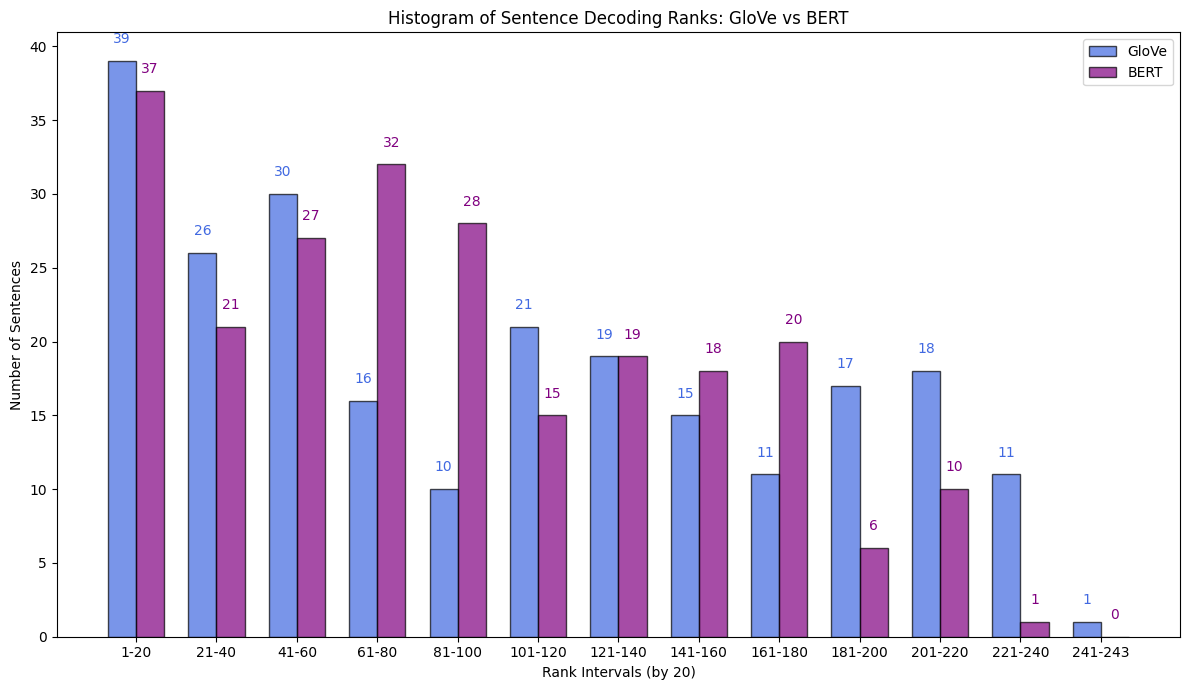

In [29]:
def plot_rank_histograms(score1, label1, color1, score2, label2, color2, max_rank=243, bin_size=20):
    """
    Plots histogram of rank intervals for two decoding methods.

    Args:
        score1, score2: list of (sentence, rank) tuples.
        label1, label2: names for legend.
        color1, color2: bar colors.
        max_rank: highest possible rank (e.g., number of sentences).
        bin_size: width of each bin.
    """
    def bin_counts(all_concept_score):
        ranks = [rank for _, rank in all_concept_score]
        counts = [0] * max_rank
        for r in ranks:
            if 1 <= r <= max_rank:
                counts[r - 1] += 1
    
        return [sum(counts[i:i+bin_size]) for i in range(0, max_rank, bin_size)]

    bins1 = bin_counts(score1)
    bins2 = bin_counts(score2)
    num_bins = int(np.ceil(max_rank / bin_size))
    x = np.arange(1, num_bins + 1)

    width = 0.35  # Bar width

    plt.figure(figsize=(12, 7))
    plt.bar(x - width/2, bins1, width=width, color=color1, alpha=0.7, label=label1, edgecolor='black')
    plt.bar(x + width/2, bins2, width=width, color=color2, alpha=0.7, label=label2, edgecolor='black')

    # Value labels
    for i in range(num_bins):
        plt.text(x[i] - width/2, bins1[i] + 1, str(bins1[i]), ha='center', va='bottom', fontsize=10, color=color1)
        plt.text(x[i] + width/2, bins2[i] + 1, str(bins2[i]), ha='center', va='bottom', fontsize=10, color=color2)

    plt.xlabel('Rank Intervals (by {})'.format(bin_size))
    plt.ylabel('Number of Sentences')
    plt.title('Histogram of Sentence Decoding Ranks: GloVe vs BERT')
    # Bin labels
    xtick_labels = [f'{i*bin_size+1}-{min((i+1)*bin_size, max_rank)}' for i in range(num_bins)]
    plt.xticks(x, xtick_labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_rank_histograms(
    all_ranks_glove,      
    "GloVe", "royalblue",
    all_ranks_bert,      
    "BERT",  "purple",
    max_rank=243,        
    bin_size=20        
)

Histogram of sentence-decoding ranks for the 243 EXP-3 sentences using GloVe (blue) and BERT (purple) embeddings. Each bar shows how many sentences fall into a 20-rank bin. GloVe places more sentences in the very top ranks (1–20 and 21–40), but BERT has more sentences in the mid-range (41–100). For higher (worse) ranks, both models are represented, but GloVe also has slightly more cases in the worst intervals above 180.

 Overall, GloVe produces more top-ranked decodings, but also more very poor outliers, while BERT’s performance is more spread out across the mid and high rank ranges. This suggests that GloVe tends to be more extreme, with both better and worse outcomes, while BERT is a bit more balanced.

# Task 3: Brain encoder model

In [30]:
# Data Loading
X_glove = vectors_243_glove      # (243, 300)
X_bert = embeddings_bert   # (243, 384)
Y = fmri_exp3 
X_glove.shape


(243, 300)

Encoding (BERT): 100%|██████████| 185866/185866 [16:10<00:00, 191.54it/s]


GLoVe: mean R²: -1.993961244691962
BERT: mean R²: -1.5382613432450662

GloVe: Number of voxels with R² > 0: 2 / 185866
BERT: Number of voxels with R² > 0: 23 / 185866

GloVe: Voxels with R² > 0.1: 0
BERT: Voxels with R² > 0.1: 8

GloVe: Mean R² for voxels with R² > 0.1: nan
BERT: Mean R² for voxels with R² > 0.1: 0.17783062383489742

GloVe: Top 10 R² values: [-0.10192529 -0.09616818 -0.09368988 -0.09050814 -0.08393664 -0.08202859
 -0.08199763 -0.07394312  0.00515826  0.05692026]
BERT: Top 10 R² values: [0.07682154 0.09096002 0.10626853 0.12173531 0.12409757 0.14975549
 0.18484925 0.18887046 0.21168587 0.33538252]


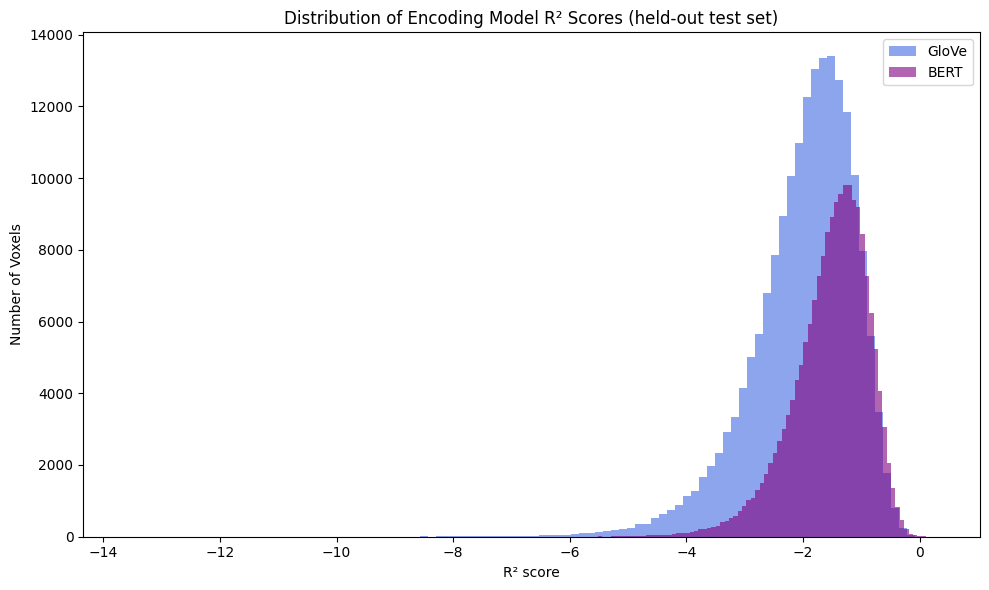

In [31]:
def compute_voxel_r2(v, X_train, X_test, Y_train, Y_test):
    model = LinearRegression()
    y_voxel_train = Y_train[:, v]
    y_voxel_test = Y_test[:, v]
    model.fit(X_train, y_voxel_train)
    y_pred = model.predict(X_test)
    return r2_score(y_voxel_test, y_pred)

def voxel_encoding_analysis_cv(X, Y, method_label, test_size=0.2, random_state=42, n_jobs=-2):
    n_voxels = Y.shape[1]
    
    # Train/test split once
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)

    # Parallel computation with progress bar
    voxels = list(range(n_voxels))
    r2_scores = Parallel(n_jobs=n_jobs)(
        delayed(compute_voxel_r2)(v, X_train, X_test, Y_train, Y_test)
        for v in tqdm(voxels, desc=f"Encoding ({method_label})")
    )

    return np.array(r2_scores)

# Data Loading (as before)
X_glove = vectors_243_glove     # (243, 300)
X_bert = embeddings_bert   # (243, 384)
Y = fmri_exp3          # (243, 185866)

# Run analysis with proper CV/split!
r2_glove = voxel_encoding_analysis_cv(X_glove, Y, "GloVe")
r2_bert = voxel_encoding_analysis_cv(X_bert, Y, "BERT")

print(f"GLoVe: mean R²: {np.mean(r2_glove)}")
print(f"BERT: mean R²: {np.mean(r2_bert)}\n")

# number of voxels with R2 > 0
print(f"GloVe: Number of voxels with R² > 0: {np.sum(r2_glove > 0)} / {len(r2_glove)}")
print(f"BERT: Number of voxels with R² > 0: {np.sum(r2_bert > 0)} / {len(r2_bert)}\n")

# threshold for "well predicted" voxels, e.g. R² > 0.05 or 0.1
print(f"GloVe: Voxels with R² > 0.1: {np.sum(r2_glove > 0.1)}")
print(f"BERT: Voxels with R² > 0.1: {np.sum(r2_bert > 0.1)}\n")

print(f"GloVe: Mean R² for voxels with R² > 0.1: {np.mean(r2_glove[r2_glove > 0.1])}")
print(f"BERT: Mean R² for voxels with R² > 0.1: {np.mean(r2_bert[r2_bert > 0.1])}\n")

top_k = 10
top_voxels_glove = np.sort(r2_glove)[-top_k:]
top_voxels_bert = np.sort(r2_bert)[-top_k:]

print(f"GloVe: Top {top_k} R² values: {top_voxels_glove}")
print(f"BERT: Top {top_k} R² values: {top_voxels_bert}")


# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(r2_glove, bins=100, alpha=0.6, label='GloVe', color='royalblue')
plt.hist(r2_bert, bins=100, alpha=0.6, label='BERT', color='purple')
plt.xlabel('R² score')
plt.ylabel('Number of Voxels')
plt.title('Distribution of Encoding Model R² Scores (held-out test set)')
plt.legend()
plt.tight_layout()
plt.show()

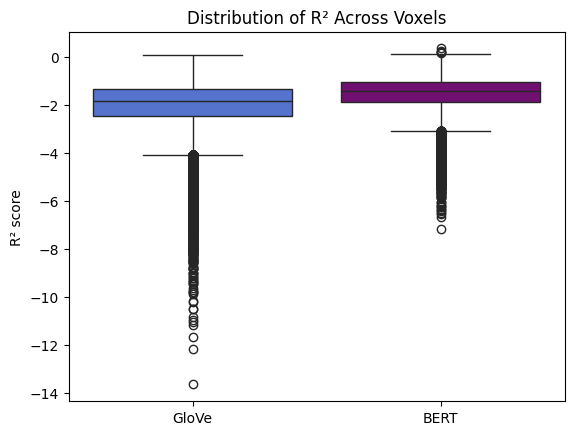

In [32]:
import seaborn as sns
sns.boxplot(data=[r2_glove, r2_bert], palette=['royalblue', 'purple'])
plt.xticks([0, 1], ['GloVe', 'BERT'])
plt.ylabel('R² score')
plt.title('Distribution of R² Across Voxels')
plt.show()

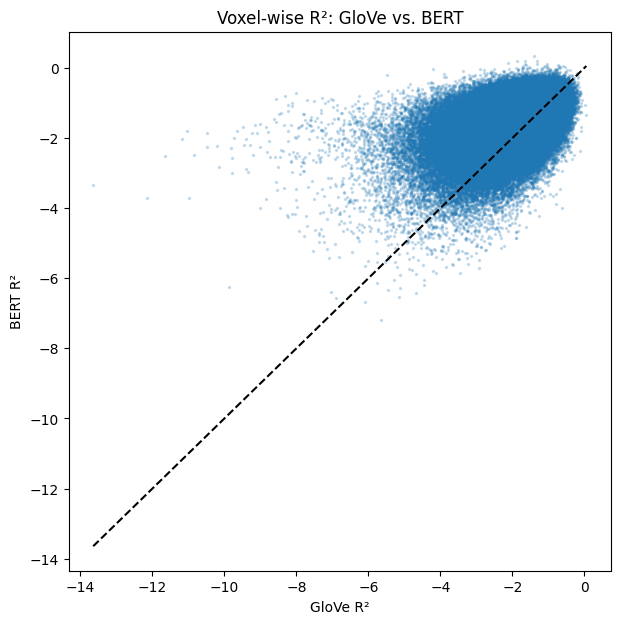

In [33]:
plt.figure(figsize=(7,7))
plt.scatter(r2_glove, r2_bert, alpha=0.2, s=2)
plt.xlabel("GloVe R²")
plt.ylabel("BERT R²")
plt.title("Voxel-wise R²: GloVe vs. BERT")
plt.plot([min(r2_glove), max(r2_glove)], [min(r2_glove), max(r2_glove)], 'k--')  
plt.show()

We can see that for both GloVe and BERT, the vast majority of voxels receive negative R² scores, meaning that their activity cannot be predicted from sentence embeddings and probably do not respond meaningfully to linguistic stimuli. However, a small number of voxels — especially for BERT — achieve positive R² scores, indicating that these areas encode information related to sentence meaning. This may reflect BERT's superiority in sentence embeddings, particularly its capacity to capture a human-level understanding of syntax.

Overall, this outcome could make sense. Since the fMRI data reflect whole-brain activity, there is a high likelihood that many recorded signals are unrelated to language interpretation. The brain is a complex system that processes various types of information, both external and internal, so it is expected that only a small subset of voxels would be affected by linguistic stimuli. Therefore, a negative R² for a voxel is reasonable when there is no correlation between its activity and the presented sentence, while a positive R² may indicate that the voxel is involved in language interpretation.
